[0.         0.7534441  1.53849386 1.10739932 1.13781518 0.69096818
 0.        ]
The angles of each joints are :  [43, 88, 63, 65, 39, 0]
Computed position: [ 0.6        -0.4         0.20000001], original position : [0.6, -0.4, 0.2]
Computed position (readable) : ['0.60', '-0.40', '0.20']


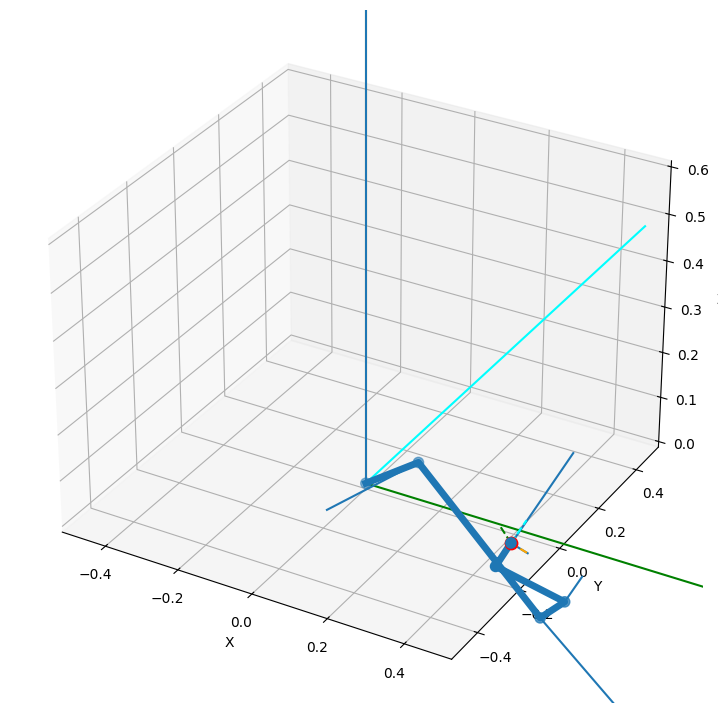

In [9]:
import ikpy.chain
import ikpy.utils.plot as plot_utils

import numpy as np
import time
import math

import ipywidgets as widgets
import serial

my_chain = ikpy.chain.Chain.from_urdf_file("Robot/robo.urdf",active_links_mask=[False, True, True, True, True, True, True])

target_position = [0.6, -0.4, 0.2]

target_orientation = [0, 0, 0]

ik = my_chain.inverse_kinematics(target_position)
# ik = my_chain.inverse_kinematics(target_position, target_orientation, orientation_mode="Y")
print(ik)
print("The angles of each joints are : ", list(map(lambda r: int(math.degrees(r)), ik.tolist()))[1:])
# print("The angles of each joints are : ", list(map(lambda r:math.degrees(r),ik.tolist())))

computed_position = my_chain.forward_kinematics(ik)
print("Computed position: %s, original position : %s" % (computed_position[:3, 3], target_position))
print("Computed position (readable) : %s" % [ '%.2f' % elem for elem in computed_position[:3, 3] ])


# %matplotlib widget
#%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
fig.set_figheight(9)  
fig.set_figwidth(13)  
my_chain.plot(ik, ax, target=target_position)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax.set_zlim(0, 0.6)
plt.ion()

# time.sleep(9999999)

def doIK():
    global ik
    old_position= ik.copy()
    ik = my_chain.inverse_kinematics(target_position, target_orientation, orientation_mode="Z", initial_position=old_position)

def move(x,y,z):
    global target_position
    target_position = [x,y,z]
    doIK()

    sendCommand(ik[1].item(),ik[2].item(),ik[3].item(),ik[4].item(),ik[5].item(),ik[6].item(),1)